## Introduction 

##### Description of Data
The U.S. Census Bureau, in collaboration with five federal agencies, launched the Household Pulse Survey to produce data on the social and economic impacts of Covid-19 on American households, including employment status, consumer spending, food security, housing, education disruptions, and dimensions of physical and mental wellness. 

##### Link to Data Source

https://catalog.data.gov/dataset/mental-health-care-in-the-last-4-weeks

##### Motivation

I was interested in analyzing the affects of the pandemic on mental health.

##### Questions

1. Does the impact of COVID-19 differ between various socio-economic groups?
2. What is the scale of measures taken by individuals to improve mental health?

## Exploratory Data

Step 3: Create another section in your notebook that explores and presents information about your data

This section does not need to be polished yet, but it should be a good foundation
This can include summary information about the data, summary statistics where appropriate, an identification of where there may be missing/incorrect/outlier data, and data preprocessing
It should include at least 4 exploratory data visualizations

In [8]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


df = pd.read_csv('https://data.cdc.gov/api/views/yni7-er2q/rows.csv?accessType=DOWNLOAD')
df.head(5)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [48]:
df1 = df.drop(columns=['Quartile Range','Suppression Flag'])
df1.head(5)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2


In [49]:
df1.describe()

,Time Period,Value,LowCI,HighCI
count,10404.000000,9914.000000,9914.000000,9914.000000
mean,28.134948,17.450736,14.771565,20.475661
std,11.040210,8.270565,7.659396,9.052521
min,1.000000,1.400000,0.800000,2.000000
25%,20.000000,10.300000,8.000000,12.900000
50%,29.000000,16.200000,13.900000,19.200000
75%,37.000000,24.000000,20.800000,27.400000
max,45.000000,62.900000,53.200000,71.900000


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10404 non-null  object 
 1   Group                   10404 non-null  object 
 2   State                   10404 non-null  object 
 3   Subgroup                10404 non-null  object 
 4   Phase                   10404 non-null  object 
 5   Time Period             10404 non-null  int64  
 6   Time Period Label       10404 non-null  object 
 7   Time Period Start Date  10404 non-null  object 
 8   Time Period End Date    10404 non-null  object 
 9   Value                   9914 non-null   float64
 10  LowCI                   9914 non-null   float64
 11  HighCI                  9914 non-null   float64
 12  Confidence Interval     9914 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


NameError: name 'height' is not defined

## Data Analysis

Step 4: Create a section in your notebook that includes the beginnings of your analysis

This section also does not need to be polished yet, but it should be a good foundation
This should include code for data analysis directly relevant to your question(s) of interest
Include an additional 4 data visualizations that are directly relevant to your topic 
Or describe 4 data visualizations that you want to make

/tmp/ipykernel_191/2616521492.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = aa[df['Group'] == 'By Age']


Text(0.5, 1.0, 'Took Prescription Medication for Mental Health In Last 4 Weeks By Age')

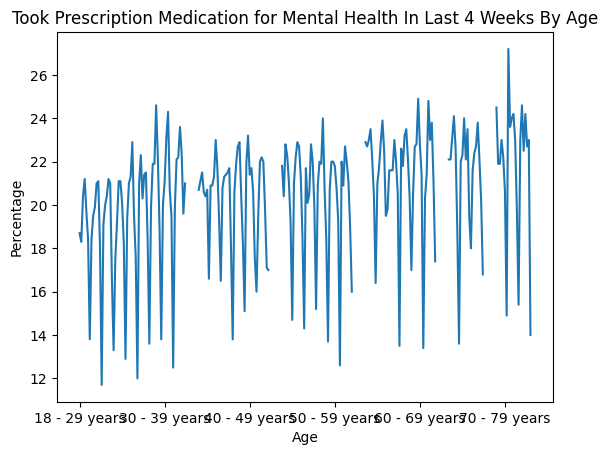

In [24]:
import matplotlib.pyplot as plt

aa = df1[df1['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
a = aa[df1['Group'] == 'By Age']

a.plot(x = 'Subgroup', y = 'Value', legend = None)

plt.xlabel("Age")
plt.ylabel("Percentage")
plt.title("Took Prescription Medication for Mental Health In Last 4 Weeks By Age")

/tmp/ipykernel_191/2658758587.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = aa[df['Group'] == 'By State']


Text(0.5, 1.0, 'Took Prescription Medication for Mental Health In Last 4 Weeks By State')

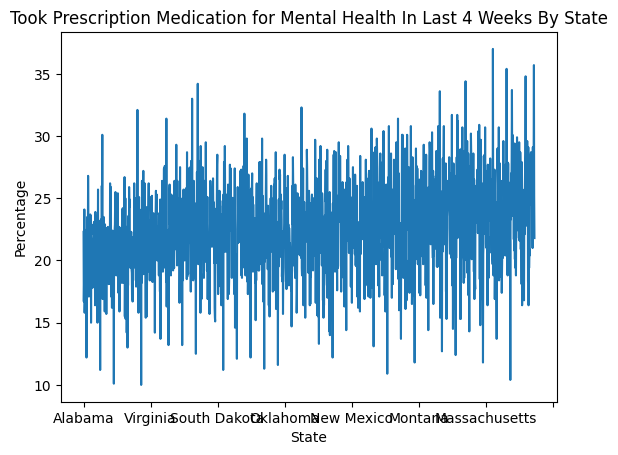

In [23]:
import matplotlib.pyplot as plt

aa = df1[df1['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
a = aa[df1['Group'] == 'By State']

a.plot(x = 'Subgroup', y = 'Value', legend = None)

plt.xlabel("State")
plt.ylabel("Percentage")
plt.title("Took Prescription Medication for Mental Health In Last 4 Weeks By State")

/tmp/ipykernel_191/1813120624.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = aa[df['Group'] == 'By Education']


Text(0.5, 1.0, 'Took Prescription Medication for Mental Health In Last 4 Weeks By Education')

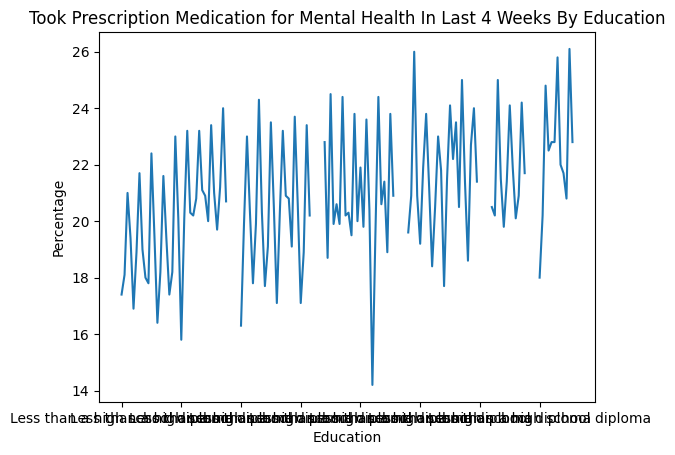

In [22]:
import matplotlib.pyplot as plt

aa = df1[df1['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
a = aa[df1['Group'] == 'By Education']

a.plot(x = 'Subgroup', y = 'Value', legend = None)

plt.xlabel("Education")
plt.ylabel("Percentage")
plt.title("Took Prescription Medication for Mental Health In Last 4 Weeks By Education")

/tmp/ipykernel_191/2819595990.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = aa[df['Group'] == 'By Race/Hispanic ethnicity']


Text(0.5, 1.0, 'Took Prescription Medication for Mental Health In Last 4 Weeks By Race')

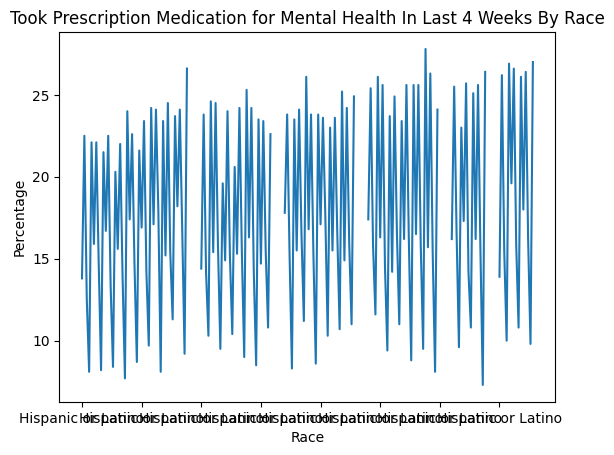

In [21]:
import matplotlib.pyplot as plt

aa = df1[df1['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
a = aa[df1['Group'] == 'By Race/Hispanic ethnicity']

a.plot(x = 'Subgroup', y = 'Value', legend = None)

plt.xlabel("Race")
plt.ylabel("Percentage")
plt.title("Took Prescription Medication for Mental Health In Last 4 Weeks By Race")